The %matplotlib magic command is used here to enable plotting in the current notebook. The inline backend will embed plots inside the notebook.

In [1]:
%matplotlib inline

#### Import necessary modules¶

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm    # colormaps for plottting

#### Read the Broadmead data. Select variables of interest and create dataframes.

In [3]:
# open netcdf file
data_url = 'http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/broadmead.nc'
ds = xr.open_dataset(data_url)

# select flux data
flux_ds = ds[['Hs', 'LE_wpl', 'agc_Avg', 'Fc_wpl', 'tau', 'u_star']]

# select 4 components of radiation
radiation_ds = ds[['Rl_downwell_Avg', 'Rl_upwell_Avg', 'Rs_downwell_Avg', 'Rs_upwell_Avg', 'albedo_Avg']]

# Select standard meteorological variables - temperature, pressure, specific humidity, wind speed and direction
met_ds = ds[['h2o_hmp_mean', 'press_mean', 'rho_a_mean', 't_hmp_mean', 'wnd_spd', 'wnd_dir_compass']]

# select rain gages
rain_ds = ds[['Rain_1_mm_Tot', 'Rain_2_mm_Tot']]

# convert to a pandas.dataframe object
radiation_df = radiation_ds.to_dataframe()
flux_df = flux_ds.to_dataframe()
met_df = met_ds.to_dataframe()
rain_df = rain_ds.to_dataframe()              

In [4]:
#print ds

In [5]:
names = {  'Hs': 'Sensible Heat Flux using Sonic Temperature (w/m**2)',
           'LE_wpl': 'Latent Heat Flux - with Webb correction (w/m**2)',
           'agc_Avg': 'Automatic Gain Control (dimensionless)',
           'Fc_wpl': 'CO2 flux (mg/(m^2 s))',
           'tau': 'Shear Stress, or momentum flux (kg/(m s^2))',
           'u_star': 'Shear velocity (aka friction velocity) (m/s)',
           'Rl_downwell_Avg': 'Downwelling longwave (w/m**2)',
           'Rl_upwell_Avg': 'Upwelling longwave (w/m**2)',
           'Rs_downwell_Avg': 'Downwelling solar (w/m**2)',
           'Rs_upwell_Avg': 'Upwelling solar (w/m**2)',
            'albedo_Avg': 'Albedo',
           'h2o_hmp_mean': 'water vapor density (g/m**3)',
           'press_mean': 'air pressure (kPa)',
           'rho_a_mean': 'air density (kg/m**3)',
           't_hmp_mean': 'air temperature (degrees C)',
           'wnd_spd': 'wind speed (m/s)',
           'wnd_dir_compass': 'wind direction (degrees from north)',
           'Rain_1_mm_Tot': 'rainfall - gage 1 (mm)',
           'Rain_1_mm_Tot': 'rainfall - gage 2 (mm)',
         }
names         

{'Fc_wpl': 'CO2 flux (mg/(m^2 s))',
 'Hs': 'Sensible Heat Flux using Sonic Temperature (w/m**2)',
 'LE_wpl': 'Latent Heat Flux - with Webb correction (w/m**2)',
 'Rain_1_mm_Tot': 'rainfall - gage 2 (mm)',
 'Rl_downwell_Avg': 'Downwelling longwave (w/m**2)',
 'Rl_upwell_Avg': 'Upwelling longwave (w/m**2)',
 'Rs_downwell_Avg': 'Downwelling solar (w/m**2)',
 'Rs_upwell_Avg': 'Upwelling solar (w/m**2)',
 'agc_Avg': 'Automatic Gain Control (dimensionless)',
 'albedo_Avg': 'Albedo',
 'h2o_hmp_mean': 'water vapor density (g/m**3)',
 'press_mean': 'air pressure (kPa)',
 'rho_a_mean': 'air density (kg/m**3)',
 't_hmp_mean': 'air temperature (degrees C)',
 'tau': 'Shear Stress, or momentum flux (kg/(m s^2))',
 'u_star': 'Shear velocity (aka friction velocity) (m/s)',
 'wnd_dir_compass': 'wind direction (degrees from north)',
 'wnd_spd': 'wind speed (m/s)'}

#### Summary statistics for flux variables

In [6]:
flux_df[['LE_wpl', 'Hs', 'agc_Avg', 'Fc_wpl', 'tau', 'u_star']].describe()

,LE_wpl,Hs,agc_Avg,Fc_wpl,tau,u_star
count,5.263350e+05,526335.000000,527921.000000,5.262270e+05,526335.000000,536806.000000
mean,-4.384170e+29,16.729205,59.043159,1.780464e+32,0.083419,0.203035
std,6.150079e+32,76.103665,16.528731,3.235088e+35,0.221305,0.162792
min,-2.342701e+35,-29280.450000,24.158220,-1.227688e+38,0.000000,0.000000
25%,2.694400e-01,-9.516594,44.000000,-1.678079e-01,0.006601,0.073755
50%,1.356547e+01,-0.198066,56.000000,1.201245e-03,0.035033,0.170399
75%,7.722938e+01,25.169590,56.000000,1.218927e-01,0.100926,0.288677
max,1.969870e+35,8602.214000,94.000000,1.996525e+38,81.578010,7.985212


#### Create flux data set that uses Automatic Gain Control to remove "bad measurements"

In [7]:
flux_ds_agc = flux_ds.where((flux_ds['agc_Avg']<65)).dropna('time')
flux_df_agc = flux_ds_agc.to_dataframe()

# check out what these times look like
flux_df_agc[['LE_wpl', 'Hs', 'Fc_wpl']].describe()

/Users/hexg/anaconda/lib/python2.7/site-packages/xarray/core/variable.py:1130: RuntimeWarning: invalid value encountered in less
  if not reflexive


,LE_wpl,Hs,Fc_wpl
count,424234.000000,424234.000000,424234.000000
mean,62.554062,20.671463,-0.036145
std,1271.473713,61.373722,0.691585
min,-825504.600000,-943.933700,-237.826700
25%,1.272771,-10.589300,-0.174891
50%,18.870040,-0.048334,-0.001784
75%,90.050590,38.131548,0.105561
max,2254.026000,784.678800,104.087100


#### Summary statistics for radiation variables

In [8]:
radiation_df[['Rl_downwell_Avg', 'Rl_upwell_Avg', 'Rs_downwell_Avg', 'Rs_upwell_Avg', 'albedo_Avg']].describe()

,Rl_downwell_Avg,Rl_upwell_Avg,Rs_downwell_Avg,Rs_upwell_Avg,albedo_Avg
count,485793.000000,485793.000000,485775.000000,485793.000000,442040.000000
mean,344.160001,383.420617,150.376237,30.912956,-0.372093
std,60.707618,59.022553,240.423161,49.601789,1.229481
min,161.073600,221.157400,-22.945680,-6.286558,-20.445540
25%,299.710900,336.295500,-1.065191,1.414219,-0.935792
50%,349.257700,382.491200,3.118054,3.071010,0.156947
75%,393.061600,425.051400,220.705000,47.160250,0.197850
max,501.203800,596.012500,1151.141000,568.323900,22.133510


#### Summary statistics for surface meteorological variables

In [9]:
met_df[['h2o_hmp_mean', 'press_mean', 'rho_a_mean', 't_hmp_mean', 'wnd_spd', 'wnd_dir_compass']].describe()

,h2o_hmp_mean,press_mean,rho_a_mean,t_hmp_mean,wnd_spd,wnd_dir_compass
count,538408.000000,527921.000000,527921.000000,538408.000000,536806.000000,538408.000000
mean,9.256713,101.106177,1.230334,12.070573,1.284656,168.429305
std,5.529762,0.755684,0.072335,15.315785,1.069263,97.973944
min,0.022745,95.510310,1.112804,-45.451800,0.029182,0.000000
25%,4.545922,100.618300,1.183612,6.270998,0.483446,82.242160
50%,8.891807,101.086400,1.215119,15.201965,1.007436,159.828050
75%,13.562560,101.580800,1.258669,21.784172,1.727483,242.649075
max,29.520520,103.901600,1.564637,38.612990,40.995170,359.999500


#### Plot time series of sensible heat flux and latext heat flux

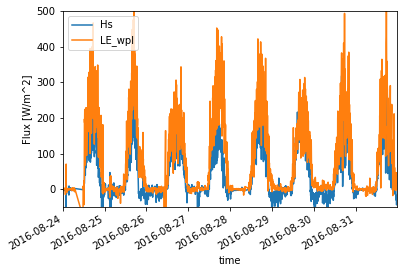

In [10]:
flux_df_agc['Hs'].loc[slice('2016-08-24', '2016-08-31')].plot()
flux_df_agc['LE_wpl'].loc[slice('2016-08-24', '2016-08-31')].plot()
plt.title("")
plt.ylim((-50, 500))
plt.ylabel('Flux [W/m^2]')
plt.legend(loc='upper left');

#### Plot time series of temperatue and water vapor density

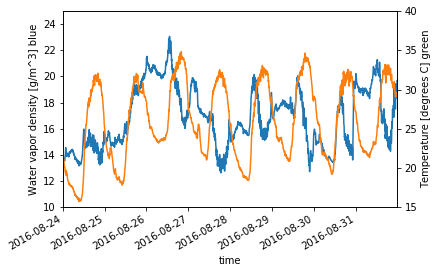

In [11]:
met_df['h2o_hmp_mean'].loc[slice('2016-08-24', '2016-08-31')].plot()
plt.title("") 
plt.ylim((10, 25))
plt.ylabel('Water vapor density [g/m^3] blue')
met_df['t_hmp_mean'].loc[slice('2016-08-24', '2016-08-31')].plot(secondary_y='t_hmp_mean')
plt.title("")
plt.ylim((15, 40))
plt.ylabel('Temperature [degrees C] green' )
#plt.legend(loc='upper left');

#### Plot time series of downwelling radiation and latent heat flux

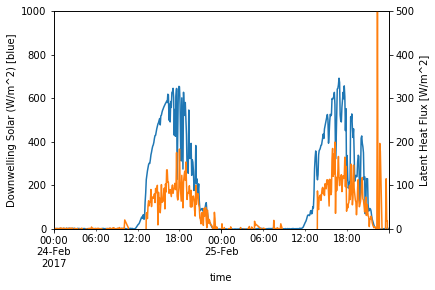

In [12]:
radiation_df['Rs_downwell_Avg'].loc[slice('2017-02-24', '2017-02-25')].plot()
plt.title("")
plt.ylim((0, 1000))
plt.ylabel('Downwelling Solar (W/m^2) [blue]')
#plt.legend(loc='upper left');
flux_df_agc['LE_wpl'].loc[slice('2017-02-24', '2017-02-25')].plot(secondary_y='LE_wpl')
plt.title("")
plt.ylim((0, 500))
plt.ylabel('Latent Heat Flux [W/m^2]')
#plt.legend(loc='upper right');

#### Plot time series of albedo

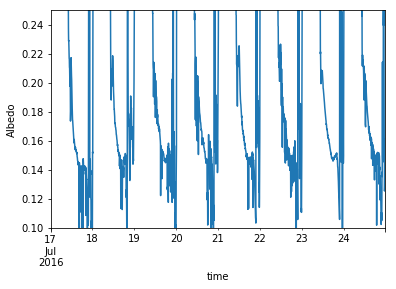

In [13]:
radiation_df['albedo_Avg'].loc[slice('2016-07-17', '2016-07-24')].plot()
plt.title("")
plt.ylim((0.10, 0.25))
plt.ylabel('Albedo')

#### Time series of shear velocity and sensible heat flux

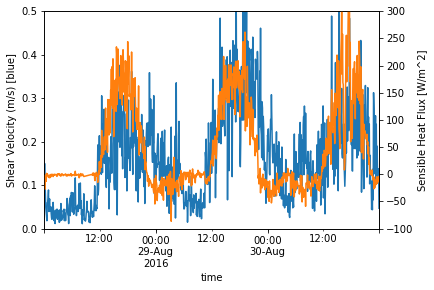

In [14]:
flux_df['u_star'].loc[slice('2016-08-28', '2016-08-30')].plot()
plt.title("")
plt.ylim((0, 0.5))
plt.ylabel('Shear Velocity (m/s) [blue]')
#plt.legend(loc='upper left');
flux_df_agc['Hs'].loc[slice('2016-08-28', '2016-08-30')].plot(secondary_y='Hs')
plt.title("")
plt.ylim((-100, 300))
plt.ylabel('Sensible Heat Flux [W/m^2]')
#plt.legend(loc='upper right');

#### Time series of CO2 flux and latent heat flux

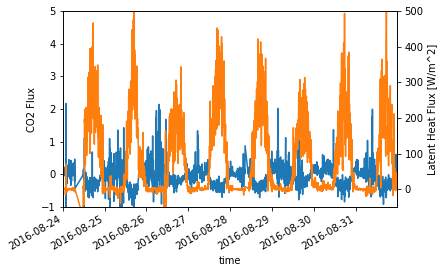

In [15]:
flux_df_agc['Fc_wpl'].loc[slice('2016-08-24', '2016-08-31')].plot()
plt.title("")
plt.ylim((-1, 5))
plt.ylabel('CO2 Flux')
#plt.legend(loc='upper right');
flux_df_agc['LE_wpl'].loc[slice('2016-08-24', '2016-08-31')].plot(secondary_y='LE_wpl')
plt.title("")
plt.ylim((-50, 500))
plt.ylabel('Latent Heat Flux [W/m^2]')
#plt.legend(loc='upper right');

#### Scatterplot of sensible heat flux and latent heat flux

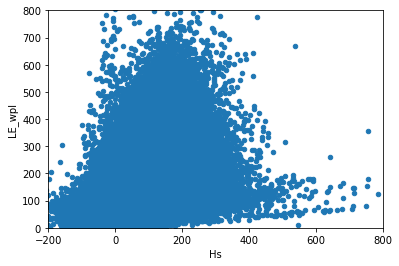

In [16]:
flux_df_agc.plot.scatter('Hs', 'LE_wpl')
plt.ylim((0, 800))
plt.xlim((-200, 800))
plt.show()

#### Seasonal cycle of sensible heat flux and latent heat flux

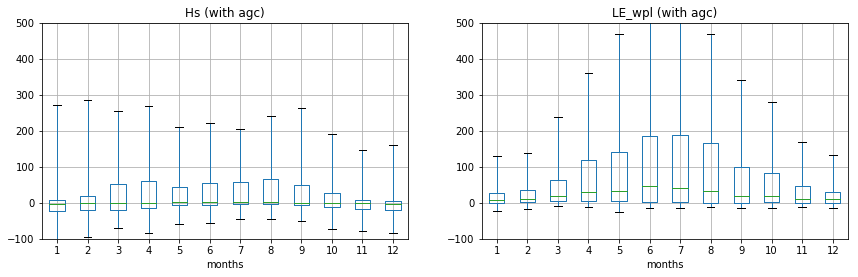

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))

flux_df_agc.boxplot(column='Hs', by=flux_df_agc.index.month, 
                      whis= [1, 99], sym='', ax=axes[0])
axes[0].set_xlabel('months') # set the xlabel on the first subplot
axes[0].set_title('Hs (with agc)')
axes[0].set_ylim(-100, 500) # set the y limits on the first subplot

flux_df_agc.boxplot(column='LE_wpl', by=flux_df_agc.index.month, 
                     whis= [1, 99], sym='', ax=axes[1])
axes[1].set_xlabel('months')
axes[1].set_title('LE_wpl (with agc)')
axes[1].set_ylim(-100, 500)

plt.suptitle('') # this makes the super title for the whole figure blank
plt.show()

#### Seasonal cycle of upwelling longwave radiation

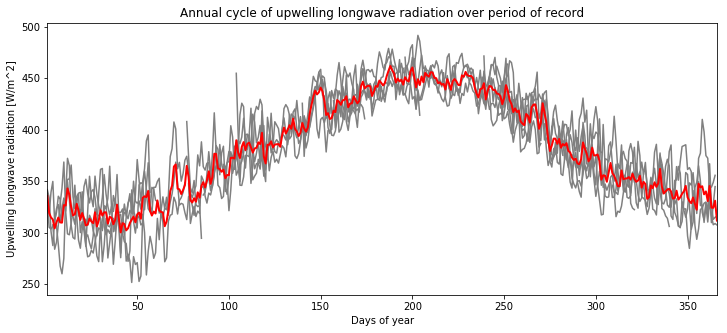

In [18]:
# pivot the data to make the index the day of year and the columns the years
pv = pd.pivot_table(radiation_df, 
                    index=radiation_df.index.dayofyear, 
                    columns=radiation_df.index.year, 
                    values='Rl_upwell_Avg', aggfunc='mean')

# plot the aggregated data, since we don't really care which year is which
# we can turn the legend off and set all the colors to gray
pv.plot(figsize=(12, 5), legend=False, color='gray')

# plot the data that has been averaged across years
pv.mean(axis=1).plot(linewidth=2, color='red')
plt.ylabel('Upwelling longwave radiation [W/m^2]')
plt.xlabel('Days of year')
plt.title('Annual cycle of upwelling longwave radiation over period of record')
plt.show()

#### Diurnal cycle of downwelling shortwave radiation by month

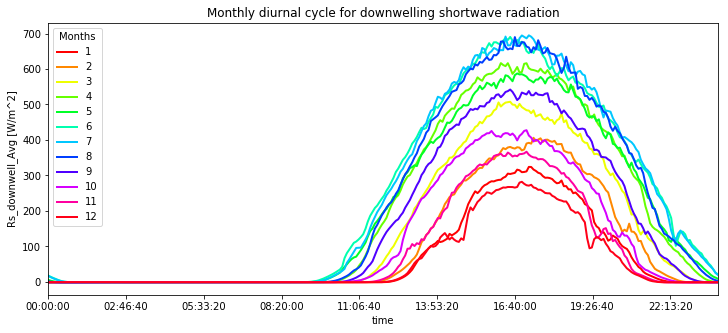

In [19]:
var = 'Rs_downwell_Avg'
title = 'Monthly diurnal cycle for downwelling shortwave radiation'

# pivot the data to make the index time of day and the columns the months
pv = pd.pivot_table(radiation_df,
                    index=radiation_df.index.time, 
                    columns=radiation_df.index.month, 
                    values=var)

# set the colors to a discretized circular colormap to fit cyclical data
pv.plot(figsize=(12, 5), color=cm.hsv(np.linspace(0, 1, 12)), linewidth=2, title=title)
plt.legend(title='Months', loc='upper left')

# using this method we can create labels that depend only on var
plt.ylabel('{var} [{units}]'.format(var=var, units=ds[var].units))

plt.savefig('../Figures/diurnalCycle_RsDownwell.png', dpi=300)
plt.show()

Diurnal cycle of 4 components of the radiation balance. To do this we create a loop that goes through each component, creates a pivot table with index=time and columns=month, then take the mean across months and concatenates the dataframe with those already computed. This concatenated dataframe is what we ultimately plot.

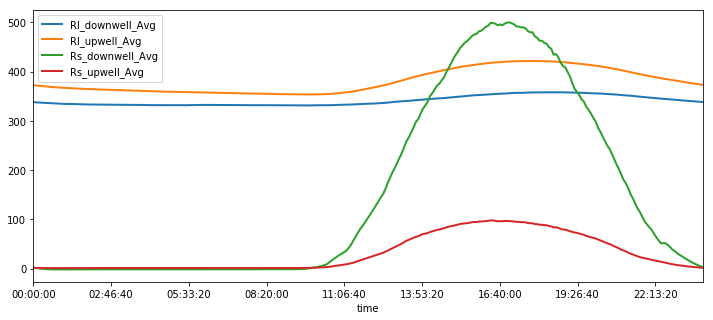

In [20]:
df = None
for v in ['Rl_downwell_Avg', 'Rl_upwell_Avg', 'Rs_downwell_Avg', 'Rs_upwell_Avg']:
    pv = pd.pivot_table(radiation_df, 
                        index=radiation_df.index.time, 
                        columns=radiation_df.index.month, 
                        values=v)
    df_rad = pd.DataFrame(pv.mean(axis=1), columns=[v])
    df = pd.concat([df, df_rad], axis=1)
df.plot(figsize=(12, 5), linewidth=2)
plt.show()

#### Create a larger dataframe for comparing different variables

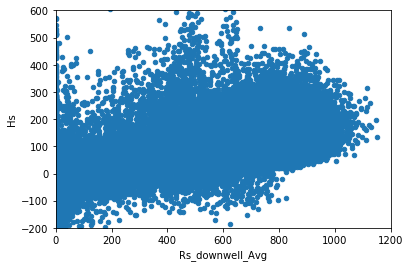

In [21]:
flux_rad_ds = ds[['Hs', 'LE_wpl', 'agc_Avg','Fc_wpl', 'tau', 'u_star', 'Rl_downwell_Avg', 'Rl_upwell_Avg', 'Rs_downwell_Avg', 'Rs_upwell_Avg', 'albedo_Avg']]
flux_rad_df = flux_rad_ds.to_dataframe()
flux_rad_df.plot.scatter('Rs_downwell_Avg', 'Hs')
plt.xlim((0, 1200))
plt.ylim((-200, 600))
plt.show()

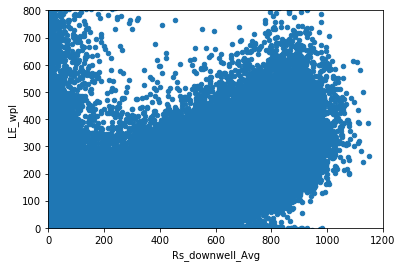

In [22]:
flux_rad_df.plot.scatter('Rs_downwell_Avg', 'LE_wpl')
plt.xlim((0, 1200))
plt.ylim((0, 800))
plt.show()